In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, roc_curve

# Configuración visual estilo Alex (limpio y profesional)
sns.set(style="whitegrid", palette="muted")
plt.rcParams['figure.figsize'] = (10, 6)

### Carga de datos


In [3]:
df = pd.read_csv('../data/processed/data.csv')
df.head()


,race,gender,age,admission_type_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,...,metformin-pioglitazone,change,diabetesMed,discharge_segment,target,numchange,nummeds,diag_1_group,diag_2_group,diag_3_group
0,Caucasian,Female,5,6,1,1,Pediatrics-Endocrinology,41,0,1,...,No,No,No,Otherwise,0,0,0,Diabetes,Other,Other
1,Caucasian,Female,15,1,7,3,NaN,59,0,18,...,No,Ch,Yes,Discharged to home,0,1,1,Other,Diabetes,Other
2,AfricanAmerican,Female,25,1,7,2,NaN,11,5,13,...,No,No,Yes,Discharged to home,0,0,1,Other,Diabetes,Other
3,Caucasian,Male,35,1,7,2,NaN,44,1,16,...,No,Ch,Yes,Discharged to home,0,1,1,Other,Diabetes,Circulatory
4,Caucasian,Male,45,1,7,1,NaN,51,0,8,...,No,Ch,Yes,Discharged to home,0,0,2,Neoplasms,Neoplasms,Diabetes


### Analisis bivariado
- Visualiza la relación entre features clave y el target desbalanceado.

In [4]:
# Visualización de la distribución del target
target = 'target'
print(f"--- Distribución del Target: {target} ---")
conteo = df[target].value_counts(normalize=True)
print(conteo)

--- Distribución del Target: target ---
target
0    0.888401
1    0.111599
Name: proportion, dtype: float64


C:\Users\asjer\AppData\Local\Temp\ipykernel_19780\621843882.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=target, data=df, palette='viridis')


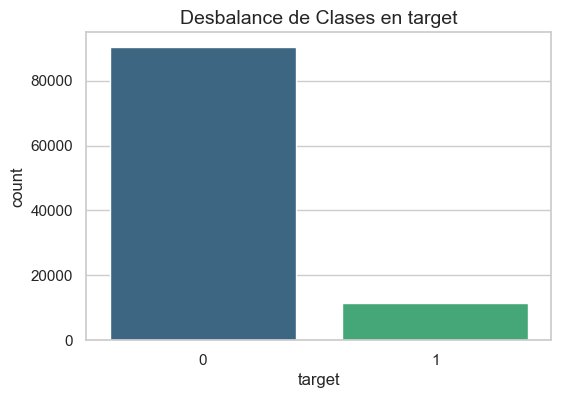

In [5]:
# 1. Visualizar el desbalance
plt.figure(figsize=(6, 4))
ax = sns.countplot(x=target, data=df, palette='viridis')
ax.set_title(f'Desbalance de Clases en {target}', fontsize=14)
plt.show()  

In [6]:
# Features que el modelo de XGBoost considera más importantes
features_interes = ['number_inpatient', 'discharge_segment', 'diabetesMed', 'number_emergency', 'metformin', 'diag_1_group', 'diag_2_group', 'number_diagnoses', 'age', 'time_in_hospital']

ValueError: Unable to parse string "Otherwise" at position 101766

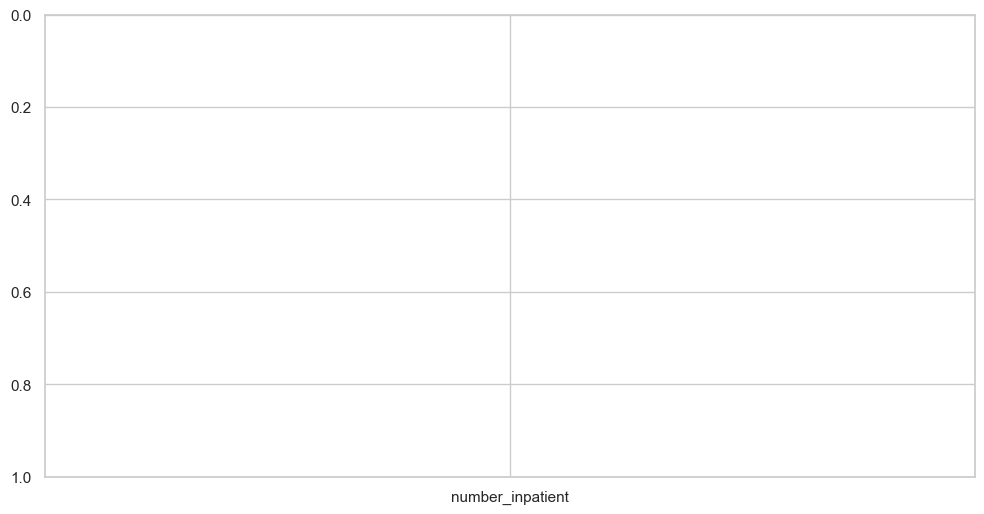

In [7]:
# 2. Boxplots para ver si las features discriminan bien
# Usamos 'melt' para graficar múltiples features en una sola figura facetada
df_melted = pd.melt(df, id_vars=target, value_vars=features_interes)
    
plt.figure(figsize=(12, 6))
sns.boxplot(x='variable', y='value', hue=target, data=df_melted, palette="Set2")
plt.title('Distribución de Variables Clave por Estado de Readmisión', fontsize=14)
plt.xticks(rotation=45)
plt.show()